In [1]:
import torch
torch.manual_seed(123)

In [2]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q
# import
import pandas as pd
import numpy as np
import sys
from fastai.tabular import *
from fastai.tabular.all import *
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path
from eb_ml_battery_lib import load_soc_dataset,get_EIS_tabular_dataset_polar,get_EIS_tabular_dataset_rectangular
from eb_ml_utils import build_tabular_learner

In [3]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("..")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']

# Data acquisition files to load from dateset folder
battery_list=["02_4","02_5","02_6","02_7","02_8","02_9","03_4","03_5","03_6","03_7","03_8","03_9","05_3","05_4","05_5","05_6","05_7","05_8"]
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

NOT running on COLAB


c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\.

## Regression - Tabular Learner - Polar 

In [4]:
dataset_polar,feature_col_names_polar=get_EIS_tabular_dataset_polar(dataset,feature_col_names)
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))

In [5]:
#Path / default location for saving/loading models
model_path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
#cat_names = ['BATTERY_ID', 'EIS_ID'] 
cat_names = [] 

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]


In [6]:
learn = build_tabular_learner(dataset_polar,splits,model_path,dep_var,cat_names,feature_col_names_polar)

SuggestedLRs(valley=0.02754228748381138)

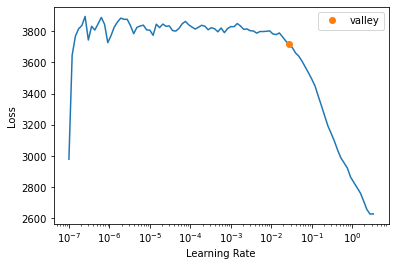

In [7]:
lr_value=learn.lr_find()
lr_value

In [8]:
learn.fit_one_cycle(250,lr_value)

epoch,train_loss,valid_loss,_rmse,time
0,3736.767822,3765.490479,61.363594,00:00
1,3738.662354,3768.056885,61.384499,00:00
2,3673.504639,3751.509521,61.249569,00:00
3,3647.299561,3711.778320,60.924366,00:00
4,3681.982666,3647.788574,60.396927,00:00
5,3648.641846,3547.201416,59.558388,00:00
6,3657.609375,3450.222656,58.738598,00:00
7,3659.128174,3374.350342,58.089157,00:00
8,3640.871338,3324.160645,57.655533,00:00
9,3629.752686,3243.688477,56.953388,00:00


In [9]:
learn.show_results()

,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float,SOC_float_pred
0,-0.812789,1.511841,-0.734567,1.242797,-0.604208,1.510146,-0.556040,1.306942,-0.457690,0.842637,-0.411796,0.678846,-0.363928,0.595008,-0.337714,0.399674,-0.301229,0.068401,-0.357575,0.121008,-0.512095,-0.024340,-0.510463,0.329813,-0.397872,0.207027,-0.365581,0.800589,30.0,34.084381
1,-0.695952,1.357131,-0.634610,1.449224,-0.482603,1.509574,-0.438918,1.214046,-0.373029,0.935699,-0.334651,0.831156,-0.178336,0.694501,-0.055690,0.949454,0.190956,0.896660,0.313937,0.959921,0.643902,0.859502,0.694649,0.666977,0.842949,0.596365,0.749664,0.406328,40.0,40.012962
2,-0.831527,1.212613,-0.744466,1.204412,-0.645589,0.989650,-0.628324,0.932963,-0.589285,0.478133,-0.636641,0.335775,-0.634797,0.129571,-0.800231,-0.030823,-1.178098,-0.560198,-1.477614,-0.544461,-1.445022,-0.152584,-1.503780,-0.433398,-1.383174,-0.443419,-1.528495,-0.951924,30.0,31.310152
3,-0.850622,1.442633,-0.783661,1.356717,-0.662246,1.531791,-0.615968,1.229652,-0.544281,0.999595,-0.467595,0.894783,-0.438180,0.862134,-0.245873,0.940173,-0.000504,1.238083,0.233937,1.349147,0.673282,1.386972,0.808883,1.260928,0.899826,1.107057,0.966573,1.080556,40.0,39.033886
4,-0.605633,-1.508353,-0.770886,-1.392238,-0.851812,-1.510121,-0.937514,-1.109617,-1.107231,-0.568172,-1.311106,-0.164966,-1.594556,-0.101404,-1.866690,0.144900,-2.227262,0.205456,-2.413521,-0.047047,-2.423880,-0.276156,-2.422858,-0.055480,-2.248866,-0.563350,-2.207913,-1.113726,70.0,69.942947
5,-0.670589,1.211367,-0.551859,1.375284,-0.478361,1.405442,-0.422963,1.154510,-0.326675,0.870367,-0.304691,0.724929,-0.210749,0.554036,-0.012345,0.472593,-0.005081,0.148326,0.018733,-0.261940,-0.129338,-0.222045,-0.167069,-0.447917,-0.270887,-0.322369,-0.253081,-0.845864,40.0,41.231689
6,-0.504545,-1.239703,-0.583679,-0.944931,-0.671303,-0.640160,-0.709691,-0.284883,-0.761895,0.053113,-0.797633,0.404715,-0.851428,0.512062,-0.881126,0.704011,-0.731295,0.969715,-0.587992,0.885514,-0.475544,0.606213,-0.431396,0.365317,-0.289383,0.611510,-0.219656,1.216339,70.0,70.521286
7,-0.471508,-1.023450,-0.550281,-0.660686,-0.616013,-0.584078,-0.664047,-0.312397,-0.716920,0.157851,-0.766846,0.330362,-0.791743,0.632371,-0.721288,0.963981,-0.588345,1.141473,-0.387141,1.100676,-0.065999,1.096063,0.002247,0.864652,0.132866,1.033369,0.253144,1.144348,80.0,76.196365
8,-0.162443,1.099268,-0.108418,1.362553,0.032705,1.084919,0.081276,0.984698,0.113644,0.629805,0.263587,0.445368,0.443935,0.028127,0.620580,-0.083714,0.565372,-0.744806,0.324568,-1.204881,-0.047679,-1.304495,-0.249442,-1.267438,-0.333615,-1.259556,-0.422955,-0.068458,40.0,35.655067


In [10]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)


2.875939

In [11]:
learn.save('EIS_tabular_regression')

Path('../models/models/EIS_tabular_regression.pth')

# Tabular Learner Regression - Rectangular

In [12]:
dataset_rect,feature_col_names_rect=get_EIS_tabular_dataset_rectangular(dataset,feature_col_names)
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))

In [13]:
#Path / default location for saving/loading models
model_path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
#cat_names = ['BATTERY_ID', 'EIS_ID'] 
cat_names = [] 

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]

In [14]:
dataset_rect,feature_col_names_rect=get_EIS_tabular_dataset_rectangular(dataset,feature_col_names)
learn = build_tabular_learner(dataset_rect,splits,model_path,dep_var,cat_names=[],cont_names=feature_col_names_rect)

SuggestedLRs(valley=0.03981071710586548)

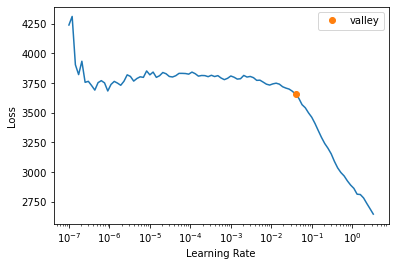

In [15]:
lr_value=learn.lr_find()
lr_value

In [16]:
learn.fit_one_cycle(250,0.045)



epoch,train_loss,valid_loss,_rmse,time
0,3836.838623,3673.889648,60.612621,00:00
1,3827.285156,3661.774414,60.512596,00:00
2,3852.673340,3630.366699,60.252525,00:00
3,3823.038086,3566.024170,59.716198,00:00
4,3815.105469,3510.971680,59.253452,00:00
5,3803.640137,3489.576904,59.072636,00:00
6,3757.390137,3439.864990,58.650364,00:00
7,3730.735840,3399.389404,58.304283,00:00
8,3680.223877,3267.575195,57.162708,00:00
9,3653.556396,3197.779297,56.548912,00:00


In [17]:
learn.show_results()

,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float,SOC_float_pred
0,-0.161298,-0.963497,-0.252542,-0.747113,-0.317473,-0.672528,-0.346720,-0.504789,-0.403483,-0.039102,-0.452152,0.137855,-0.421749,0.346698,-0.400883,0.410578,-0.312264,0.498039,-0.230896,0.755650,-0.011907,0.791918,0.050423,0.591611,0.131482,0.466687,0.198896,0.172668,80.0,78.166748
1,0.272299,0.813083,0.290682,0.475117,0.343943,0.422742,0.412949,0.273637,0.425424,-0.192385,0.480563,-0.291793,0.402783,-0.621017,0.246436,-1.017038,-0.076675,-0.989556,-0.302027,-0.808314,-0.425196,-0.648881,-0.410327,-0.274929,-0.571620,-0.396352,-0.510256,-0.420718,20.0,22.138384
2,-0.832141,1.569377,-0.749048,1.398451,-0.644211,1.340097,-0.588755,1.139958,-0.502317,1.029011,-0.434774,0.900599,-0.366254,0.812185,-0.251937,0.743928,0.096490,0.756967,0.250620,0.724368,0.331951,0.855957,0.461336,0.800342,0.562191,0.911274,0.582185,0.967770,40.0,35.165321
3,-0.376761,-0.286180,-0.410452,-0.129951,-0.410770,0.078213,-0.452277,0.228720,-0.457795,0.508912,-0.433220,0.633587,-0.367233,0.762525,-0.194348,0.913793,0.084896,1.040592,0.394574,0.908912,0.517644,0.788897,0.634792,0.754689,0.651398,0.657022,0.757308,1.105927,90.0,87.920670
4,-0.131124,1.143794,-0.032414,1.167655,0.085499,0.950918,0.083649,0.910370,0.174953,0.432498,0.265933,0.258207,0.462568,0.176647,0.465347,-0.146950,0.579567,-0.783973,0.303729,-1.010981,-0.149521,-1.301831,-0.238756,-1.101984,-0.441987,-1.125618,-0.463473,-0.574210,40.0,35.279861
5,-0.050443,-0.078707,0.085031,0.613529,0.167568,0.311227,0.155134,0.282036,0.246982,0.153864,0.300371,0.120510,0.376972,-0.104390,0.378127,-0.463924,0.264147,-0.561327,0.120232,-0.396003,0.086141,-0.263140,0.055205,-0.633598,-0.025418,-0.659787,-0.170514,-1.018925,100.0,94.355782
6,-0.244575,-0.972470,-0.305422,-1.057034,-0.415025,-0.764356,-0.447398,-0.439550,-0.492099,0.003858,-0.561594,0.189979,-0.587048,0.438137,-0.543621,0.687053,-0.467976,0.859593,-0.155518,1.062145,0.013499,1.162267,0.242703,1.065179,0.300011,0.672278,0.431905,0.672125,70.0,70.927032
7,-0.300745,-0.607885,-0.508804,-1.127034,-0.662522,-0.671706,-0.642049,-0.084855,-0.710381,0.160401,-0.747935,0.424546,-0.773271,0.559477,-0.785456,0.763873,-0.654489,0.860528,-0.486452,1.077647,-0.275894,0.854347,-0.164881,1.049251,-0.038767,0.250480,-0.046966,0.445308,60.0,60.161755
8,0.323322,0.922840,0.347627,0.653270,0.405158,0.745992,0.471397,0.760012,0.625450,0.257561,0.729368,0.198006,0.887399,0.118971,1.123003,-0.159026,1.243009,-0.218276,1.360156,-0.160826,1.465563,0.072064,1.366861,0.169578,1.434714,0.414435,1.445474,0.452401,20.0,22.654209


In [18]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)

3.048469

In [19]:
learn.save('EIS_tabular_regression_rect')

Path('../models/models/EIS_tabular_regression_rect.pth')

In [20]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=28, out_features=300, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=300, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0

In [21]:
learn.summary()

TabularModel (Input shape: 32 x 0)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 28             
BatchNorm1d                               56         True      
____________________________________________________________________________
                     32 x 300            
Linear                                    8400       True      
ReLU                                                           
BatchNorm1d                               600        True      
____________________________________________________________________________
                     32 x 200            
Linear                                    60000      True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     32 x 100            
Linear                                    20000      T

# Regression - Tabular Learner - Single Battery

epoch,train_loss,valid_loss,_rmse,time
0,4009.796143,3763.403320,61.346584,00:00
1,3781.072021,3744.845459,61.195141,00:00
2,3800.131104,3700.398926,60.830902,00:00
3,3790.054199,3628.609619,60.237942,00:00
4,3718.254150,3523.393555,59.358181,00:00
5,3658.722900,3412.453613,58.416206,00:00
6,3637.994385,3297.671143,57.425354,00:00
7,3618.222656,3197.417969,56.545719,00:00
8,3599.227783,3105.838623,55.730053,00:00
9,3573.473389,3072.626221,55.431274,00:00


RMSE :2.5524514


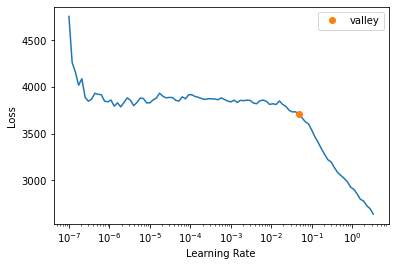

In [22]:
battery_list=["02_4","02_5","02_6","02_7","02_8","02_9"]
dataset_polar,feature_col_names_polar=get_EIS_tabular_dataset_polar(dataset,feature_col_names)
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))
#Path / default location for saving/loading models
model_path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
#cat_names = ['BATTERY_ID', 'EIS_ID'] 
cat_names = [] 

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]

learn = build_tabular_learner(dataset_polar,splits,model_path,dep_var,cat_names,feature_col_names_polar)
lr_value=learn.lr_find()
learn.fit_one_cycle(250,lr_value)
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
print("RMSE :" + str(mean_squared_error(y_true,y_pred,squared=False)))

epoch,train_loss,valid_loss,_rmse,time
0,3735.506836,4201.385742,64.818100,00:00
1,3553.799805,4173.496094,64.602600,00:00
2,3494.626221,4129.972656,64.264862,00:00
3,3500.018799,4065.899414,63.764404,00:00
4,3508.769775,3986.579346,63.139370,00:00
5,3472.578613,3874.218262,62.243217,00:00
6,3470.028564,3833.552979,61.915691,00:00
7,3463.238770,3775.971436,61.448933,00:00
8,3431.189453,3610.806641,60.089989,00:00
9,3398.760498,3541.489258,59.510414,00:00


RMSE :3.3918989


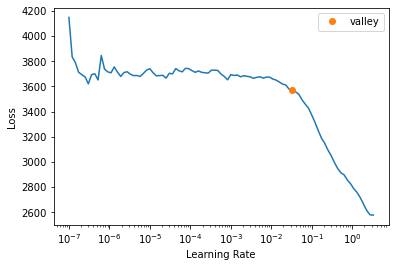

In [23]:

# Tabular Learner Regression - Rectangular
dataset_rect,feature_col_names_rect=get_EIS_tabular_dataset_rectangular(dataset,feature_col_names)
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))
#Path / default location for saving/loading models
model_path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
#cat_names = ['BATTERY_ID', 'EIS_ID'] 
cat_names = [] 

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]
dataset_rect,feature_col_names_rect=get_EIS_tabular_dataset_rectangular(dataset,feature_col_names)
learn = build_tabular_learner(dataset_rect,splits,model_path,dep_var,cat_names=[],cont_names=feature_col_names_rect)
lr_value=learn.lr_find()
learn.fit_one_cycle(250,0.045)

from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)
print("RMSE :" + str(mean_squared_error(y_true,y_pred,squared=False)))
